In [1]:
import ROOT as rt
import uproot
# from root_numpy import root2array, tree2array
#from root_pandas import read_root
import h5py 

import numpy as np
import numpy.lib.recfunctions as nlr
import pandas as pd
import os, sys
from matplotlib import pyplot as plt
import math
import json

#import gpustat
#gpustat.print_gpustat()
#os.environ['CUDA_VISIBLE_DEVICES']='3'

Welcome to JupyROOT 6.22/06


In [2]:
def samp_to_df(file_name):
    samp_file = uproot.open(file_name)
    samp_array = samp_file['Events'].arrays()
    samp_df = pd.DataFrame(samp_array)
    return samp_df

In [4]:
path = '/storage/af/user/nlu/work/HH/ntuples/20210712_regression_v2/option5/combined/BDT/'
qcd_df= samp_to_df(path+'2018/qcd/QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted_Testing_BDTs.root')
ttbarhad_df= samp_to_df(path+'2018/ttbar/TTToHadronic_TuneCP5_13TeV-powheg-pythia8-combined_1pb_weighted_Testing_BDTs.root')
ttbarsl_df = samp_to_df(path+'2018/ttbar/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8-combined_1pb_weighted_Testing_BDTs.root')
HHggSM_df = samp_to_df(path+'2018/HHc1/GluGluToHHTo4B_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8_1pb_weighted_Testing_BDTs.root')
HHVBFSM_df = samp_to_df(path+'2018/HHVBFSM/VBF_HH_CV_1_C2V_1_C3_1_dipoleRecoilOff-TuneCP5_PSweights_13TeV-madgraph-pythia8_1pb_weighted_BDTs.root')

In [5]:
path_2 = '/storage/af/user/nlu/work/HH/ntuples/20210510_regression/option5/combined/BDT/'
qcd_df_2 = samp_to_df(path_2+'2018/qcd/QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted_Testing_BDTs.root')
ttbarhad_df_2 = samp_to_df(path_2+'2018/ttbar/TTToHadronic_TuneCP5_13TeV-powheg-pythia8-combined_1pb_weighted_Testing_BDTs.root')
ttbarsl_df_2 = samp_to_df(path_2+'2018/ttbar/TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8-combined_1pb_weighted_Testing_BDTs.root')
HHggSM_df_2 = samp_to_df(path_2+'2018/HHc1/GluGluToHHTo4B_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8_1pb_weighted_Testing_BDTs.root')
HHVBFSM_df_2 = samp_to_df(path_2+'2018/HHVBFSM/VBF_HH_CV_1_C2V_1_C3_1_dipoleRecoilOff-TuneCP5_PSweights_13TeV-madgraph-pythia8_1pb_weighted_BDTs.root')


In [6]:
qcd_df[b'weight'][10]

2.0

In [7]:
dfs = [qcd_df, ttbarhad_df, ttbarsl_df, HHggSM_df, HHVBFSM_df]
df_names = ['QCD','TTToHadronic','TTToSemiLeptonic','GluGluToHH', 'VBFToHH']
colors = ['blue', 'red', 'black', 'olive', 'seagreen', 'forestgreen', 'navy', 'purple', 'salmon', 'darkorange', 'crimson']

branch_names = [b'hh_pt', b'hh_eta', b'hh_mass', b'met', b'fatJet1Tau3OverTau2', b'fatJet2Tau3OverTau2', b'fatJet1MassSD', b'fatJet1Pt', b'fatJet1Eta',
           b'fatJet1PNetXbb', b'fatJet1PNetQCDb', b'fatJet1PNetQCDbb', b'fatJet1PNetQCDothers', b'fatJet2Pt', b'fatJet1PtOverMHH',
                b'fatJet2PtOverMHH', b'ptj2_over_ptj1', b'disc_qcd_and_ttbar_Run2_enhanced_v8p2']

var_names = ['hh_pt', 'hh_eta', 'hh_mass', 'MET', 'fatJet1Tau3OverTau2', 'fatJet2Tau3OverTau2', 'fatJet1MassSD', 'fatJet1Pt', 'fatJet1Eta',
        'fatJet1PNetXbb', 'fatJet1PNetQCDb', 'fatJet1PNetQCDbb', 'fatJet1PNetQCDothers', 'fatJet2Pt', 'fatJet1PtOverMHH',
             'fatJet2PtOverMHH', 'ptj2_over_ptj1', 'disc_qcd_and_ttbar_Run2_enhanced_v8p2']
var_titles = ['$p_{T}$ of dijet system [GeV]', '$\eta$ of dijet system', 'mass of dijet system', 'MET [GeV]', r'$\tau_{32}^{Jet 1}$', 
              r'$\tau_{32}^{Jet 2}$', '${m_{SD}}_{Jet 1}$', '${p_{T}}_{Jet 1}$', '$\eta_{Jet 1}$',
        'Jet 1 tagger $P_{Xbb}$', 'Jet 1 tagger $P_{QCDb}$', 'Jet 1 tagger $P_{QCDbb}$', 'Jet 1 tagger $P_{QCDothers}$', 
              '${p_{T}}_{Jet 2}$', 'Jet 1 $p_{T}$ over dijet system mass',
             'Jet 2 $p_{T}$ over dijet system mass', '${p_{T}}^{j1} / {p_{T}}^{j2}$', 'Event BDT score']

xlim_lo = [0,  -8,0,   0,  0,0,0,  250, -3,0.8,0,  0.0,0,   250, 0,0,0,0]
xlim_hi = [1000,8,3000,500,1,1,300,1250, 3,1.0,0.1,0.2,0.02,1250,1,1,3,1]

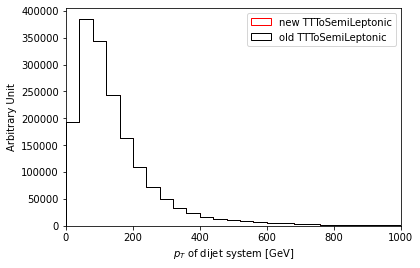

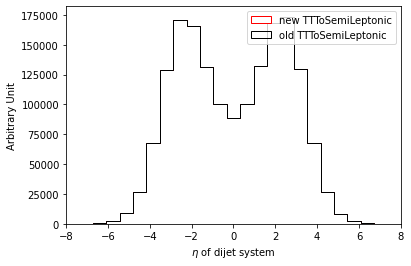

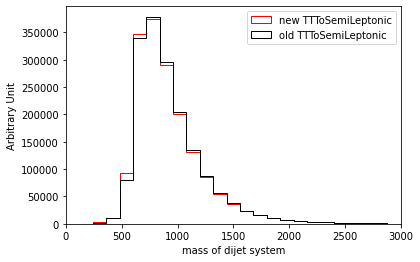

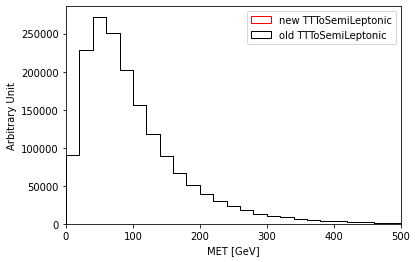

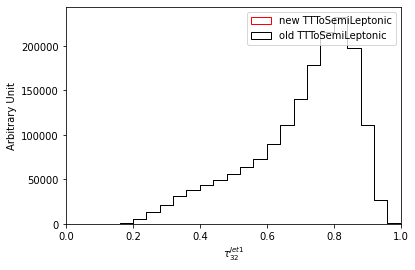

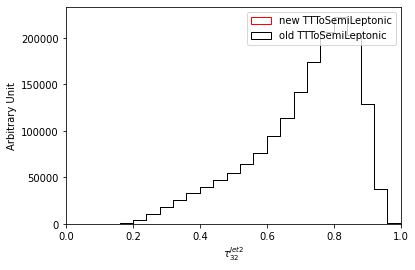

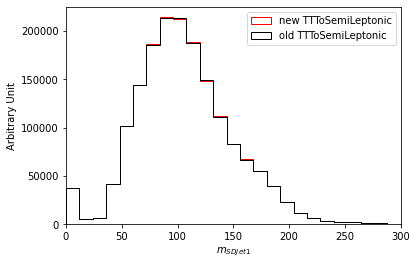

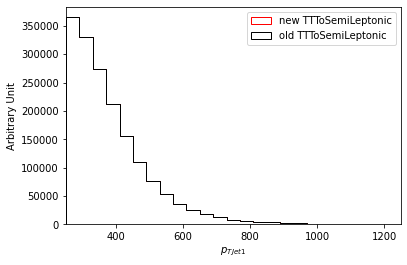

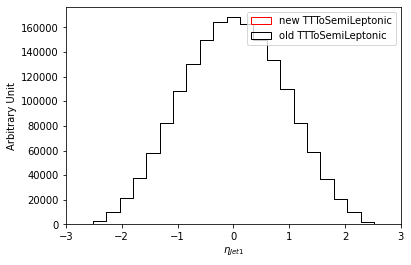

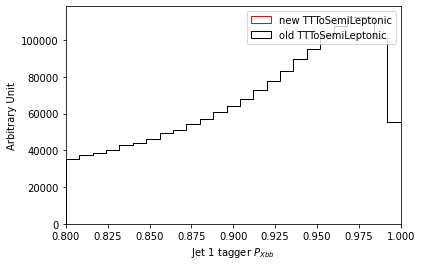

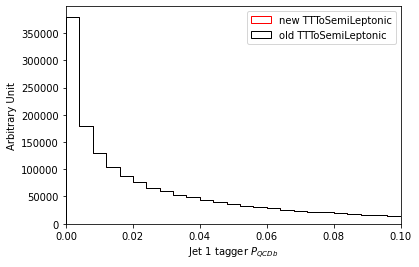

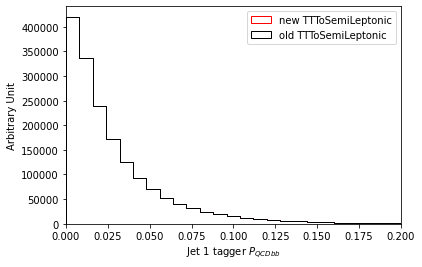

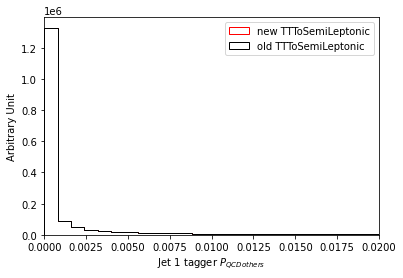

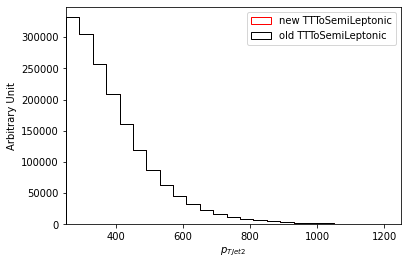

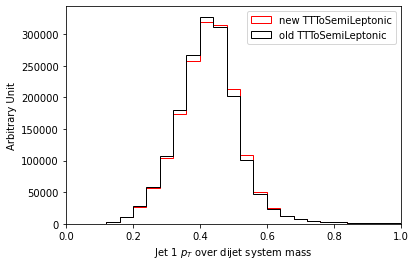

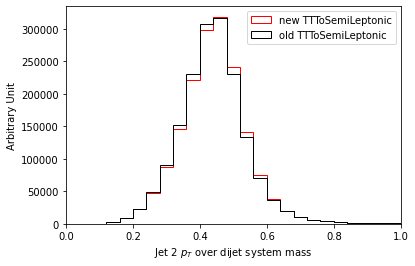

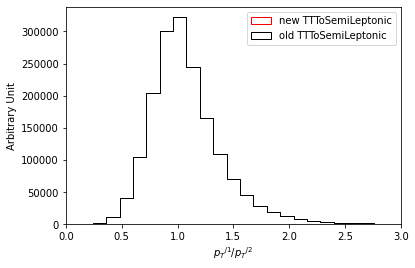

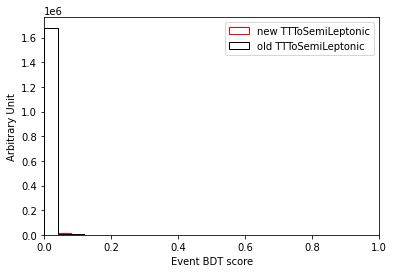

In [9]:
for j in range(len(var_names)):
    plt.figure
    #plt.yscale('log')
    plt.hist(ttbarsl_df[branch_names[j]], color=colors[1], bins=25, histtype='step', weights = ttbarsl_df[b'weight'], range=(xlim_lo[j], xlim_hi[j]), density=False, label='new TTToSemiLeptonic') #range=(0,1))
    plt.xlim(xlim_lo[j], xlim_hi[j])
    plt.hist(ttbarsl_df_2[branch_names[j]], color=colors[2], bins=25, histtype='step', weights = ttbarsl_df_2[b'weight'], range=(xlim_lo[j], xlim_hi[j]), density=False, label='old TTToSemiLeptonic') #range=(0,1))
    plt.xlim(xlim_lo[j], xlim_hi[j])
    
    plt.xlabel(var_titles[j])
    plt.ylabel("Arbitrary Unit")
    plt.legend(loc='best')
    #plt.savefig(var_names[j]+"1.pdf", dpi=150)
    plt.show()

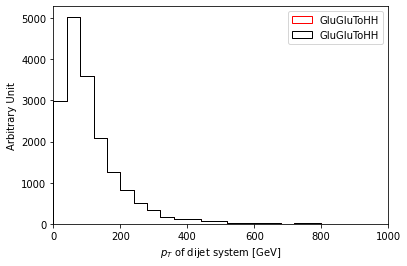

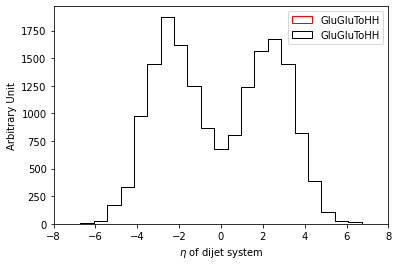

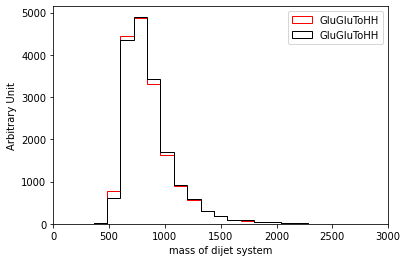

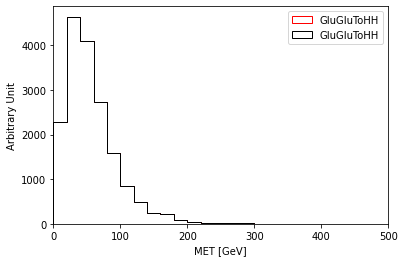

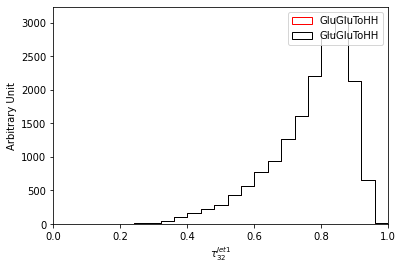

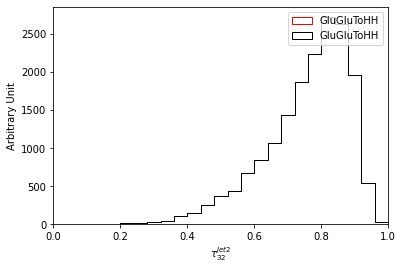

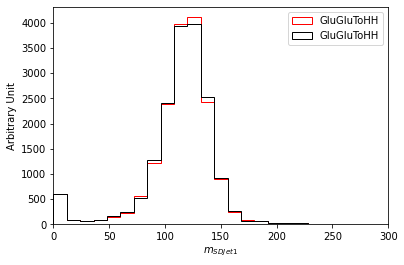

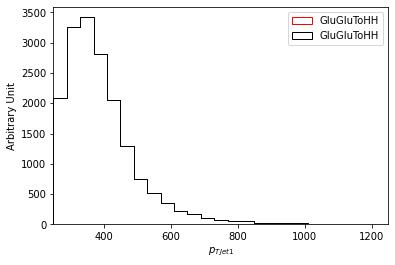

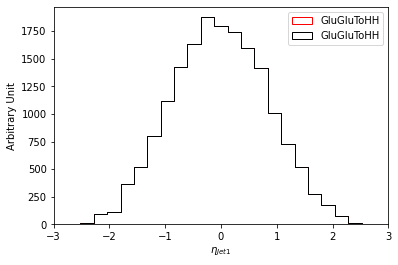

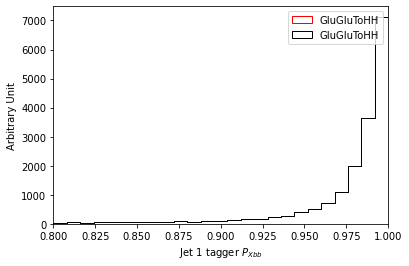

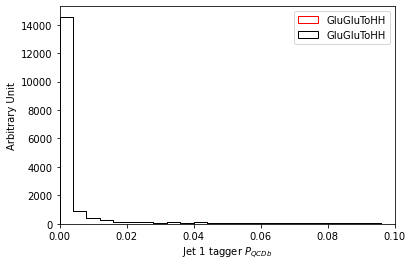

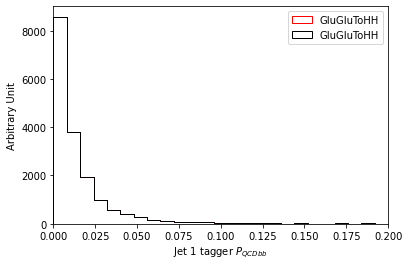

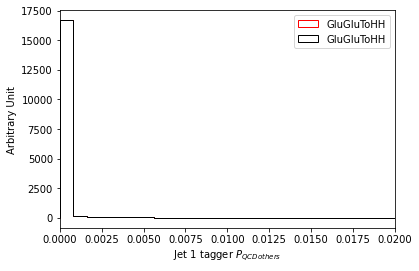

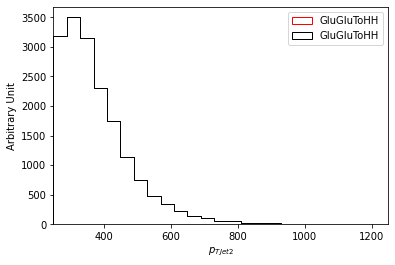

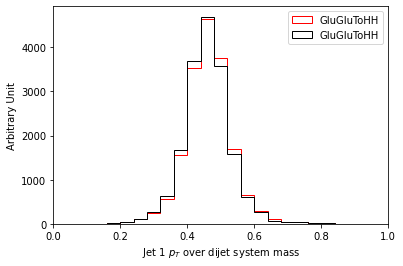

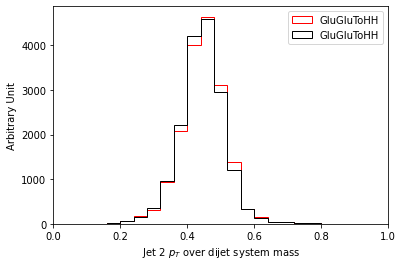

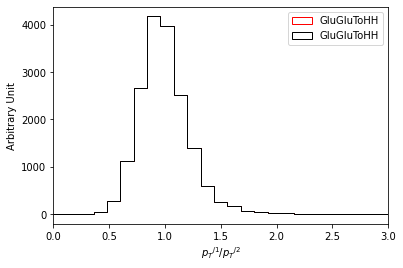

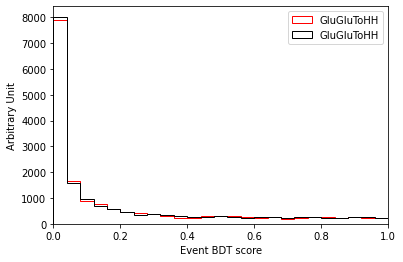

In [11]:
for j in range(len(var_names)):
    plt.figure
    plt.hist(HHggSM_df[branch_names[j]], color=colors[1], bins=25, histtype='step', weights = HHggSM_df[b'weight'], range=(xlim_lo[j], xlim_hi[j]), density=False, label=f'{df_names[3]}')#, range=(0,1))
    plt.xlim(xlim_lo[j], xlim_hi[j])
    plt.hist(HHggSM_df_2[branch_names[j]], color=colors[2], bins=25, histtype='step', weights = HHggSM_df_2[b'weight'], range=(xlim_lo[j], xlim_hi[j]), density=False, label=f'{df_names[3]}')#, range=(0,1))
    plt.xlim(xlim_lo[j], xlim_hi[j])
    
    plt.xlabel(var_titles[j])
    plt.ylabel("Arbitrary Unit")
    plt.legend(loc='best')
    #plt.savefig(var_names[j]+"1.pdf", dpi=150)
    plt.show()

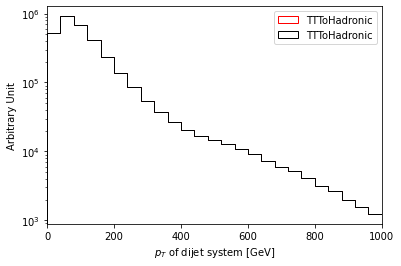

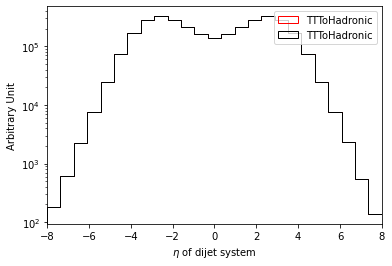

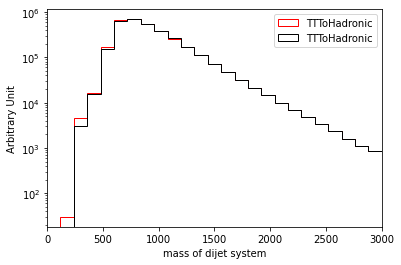

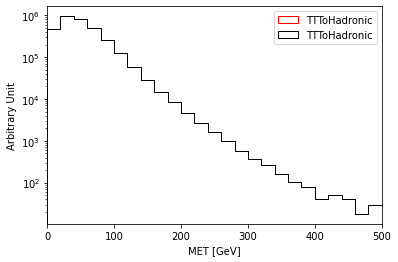

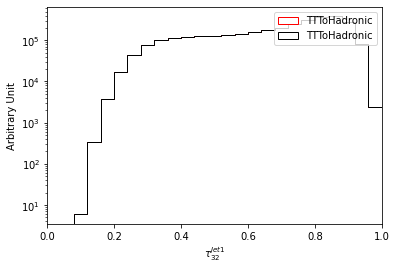

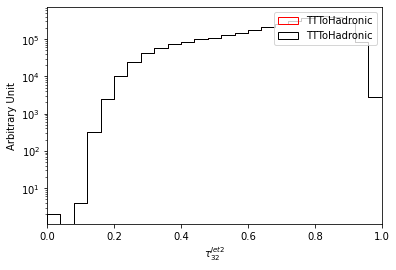

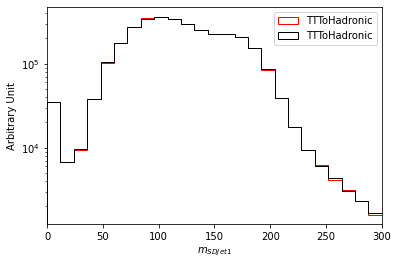

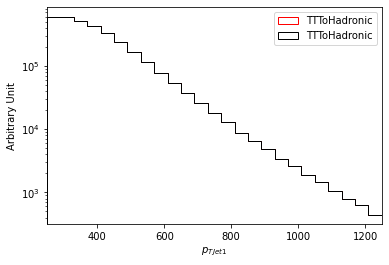

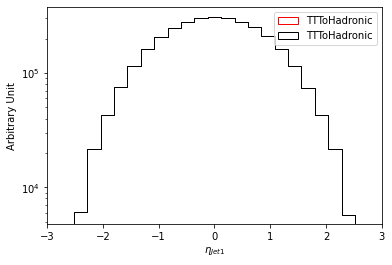

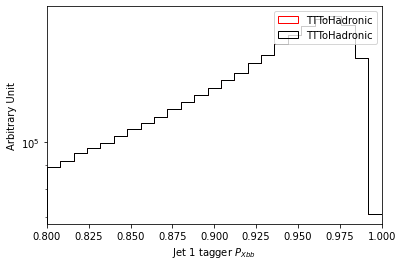

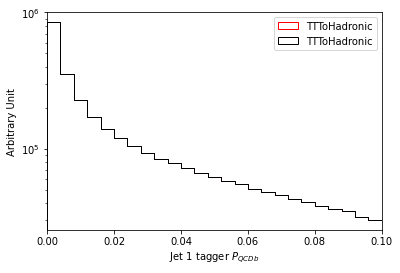

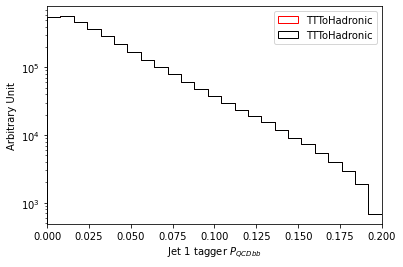

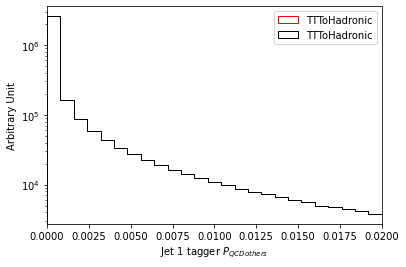

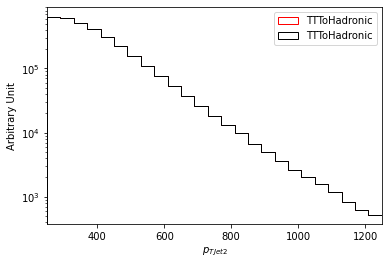

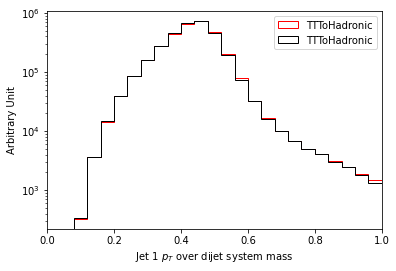

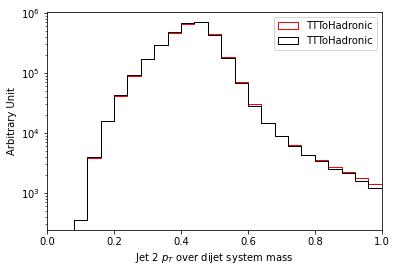

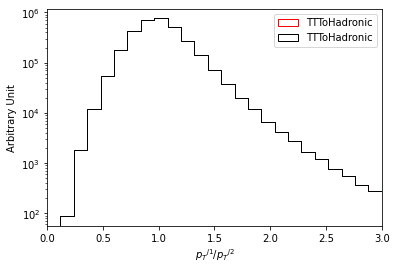

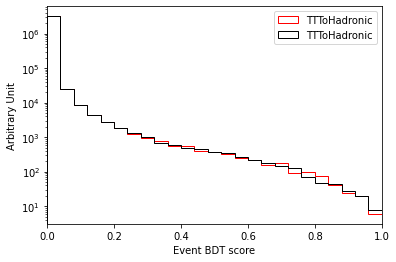

In [12]:
for j in range(len(var_names)):
    plt.figure
    plt.yscale('log')
    plt.hist(ttbarhad_df[branch_names[j]], color=colors[1], bins=25, histtype='step', weights = ttbarhad_df[b'weight'], range=(xlim_lo[j], xlim_hi[j]), density=False, label=f'{df_names[1]}')#, range=(0,1))
    plt.xlim(xlim_lo[j], xlim_hi[j])
    plt.hist(ttbarhad_df_2[branch_names[j]], color=colors[2], bins=25, histtype='step', weights = ttbarhad_df_2[b'weight'], range=(xlim_lo[j], xlim_hi[j]), density=False, label=f'{df_names[1]}')#, range=(0,1))
    plt.xlim(xlim_lo[j], xlim_hi[j])
    
    plt.xlabel(var_titles[j])
    plt.ylabel("Arbitrary Unit")
    plt.legend(loc='best')
    #plt.savefig(var_names[j]+"1.pdf", dpi=150)
    plt.show()

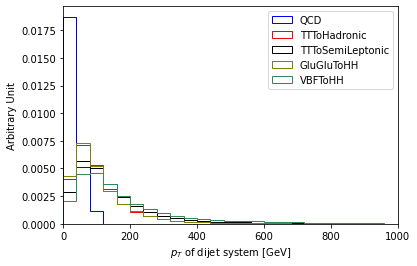

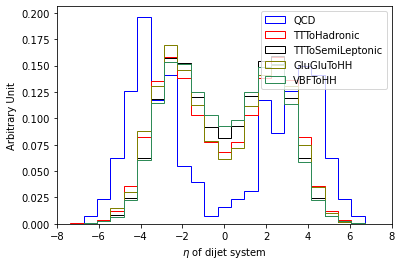

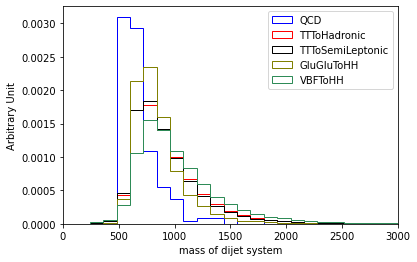

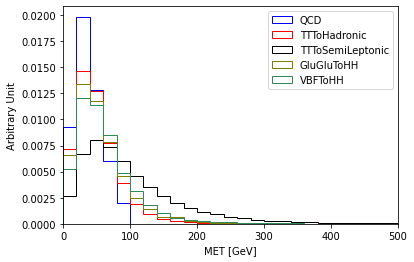

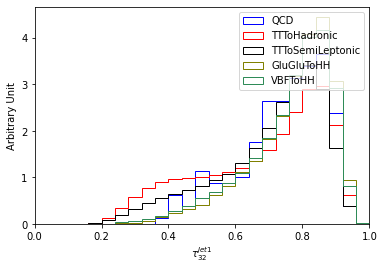

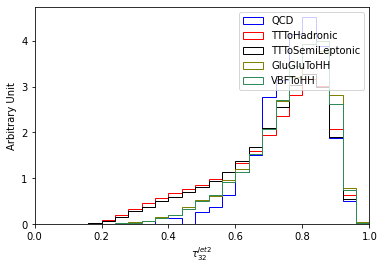

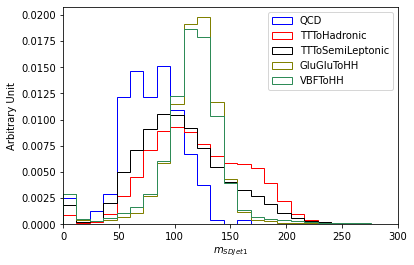

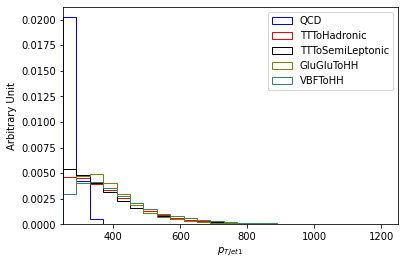

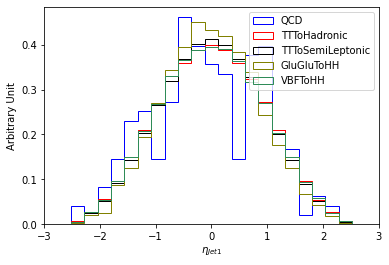

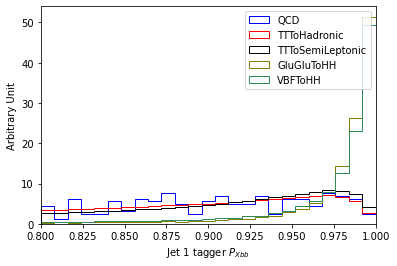

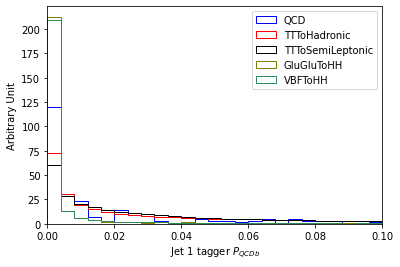

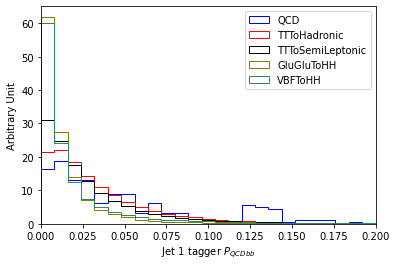

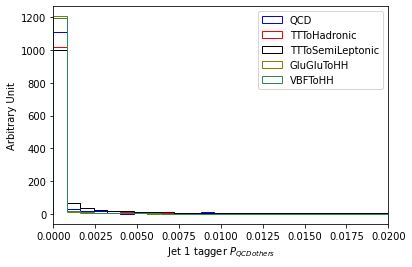

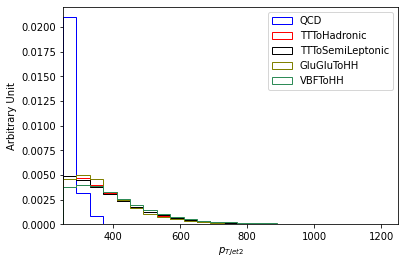

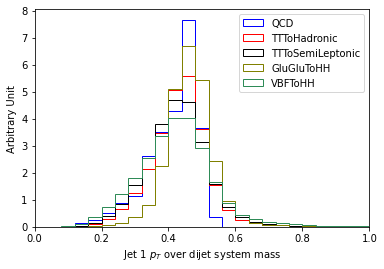

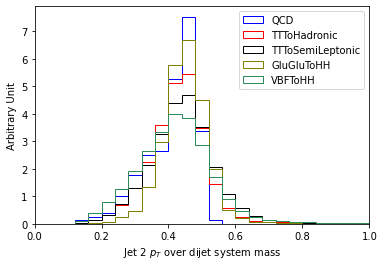

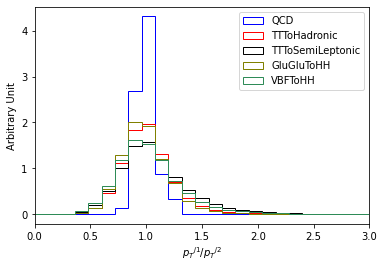

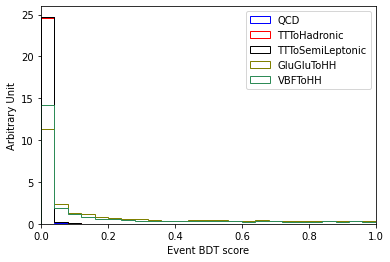

In [14]:
for j in range(len(var_names)):
    plt.figure
    for i in range(len(dfs)):
        plt.hist(dfs[i][branch_names[j]], color=colors[i], bins=25, histtype='step', weights = dfs[i][b'weight'], range=(xlim_lo[j], xlim_hi[j]), density=True, label=f'{df_names[i]}')#, range=(0,1))
        plt.xlim(xlim_lo[j], xlim_hi[j])
    plt.xlabel(var_titles[j])
    plt.ylabel("Arbitrary Unit")
    plt.legend(loc='best')
    plt.savefig(var_names[j]+".pdf", dpi=150)
    plt.show()

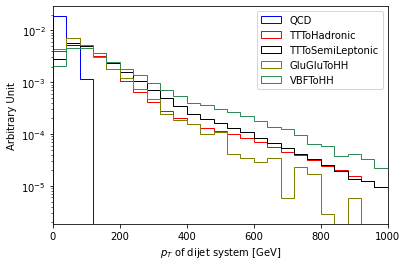

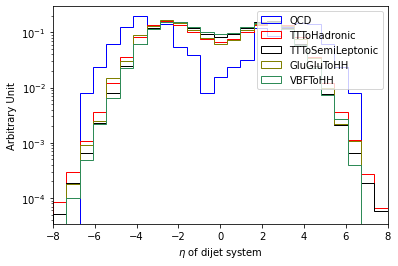

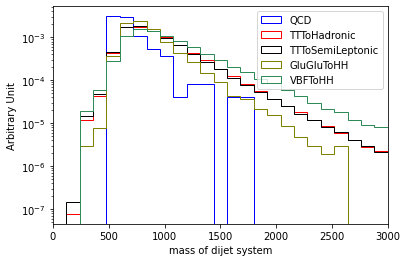

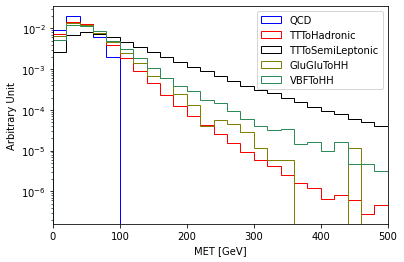

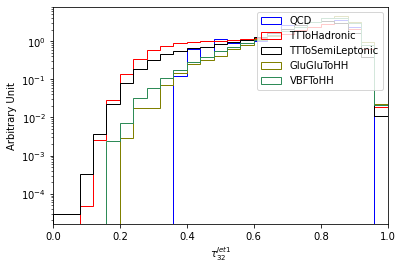

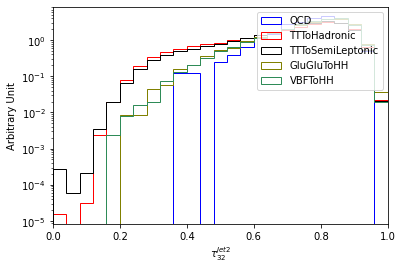

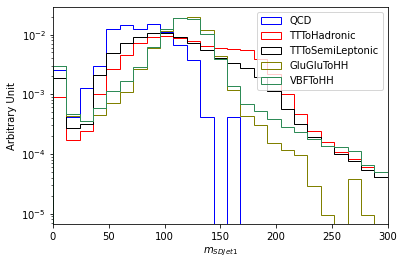

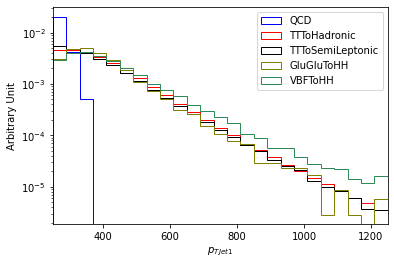

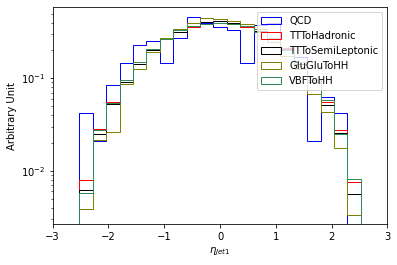

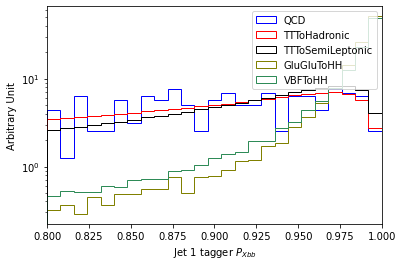

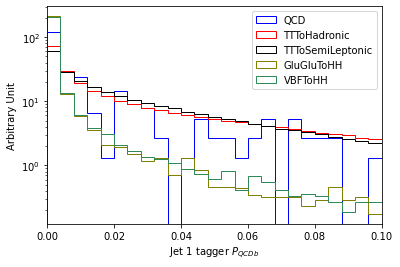

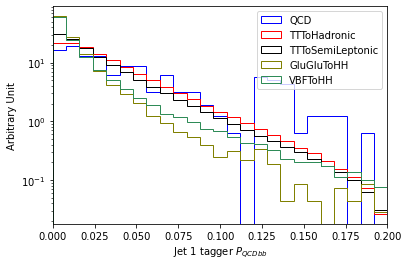

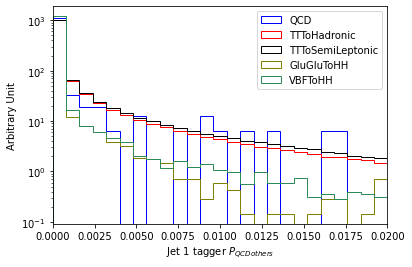

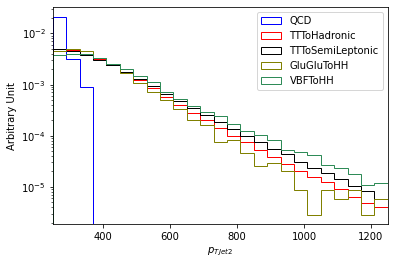

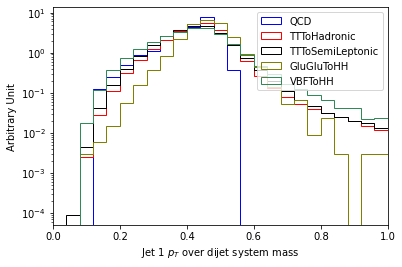

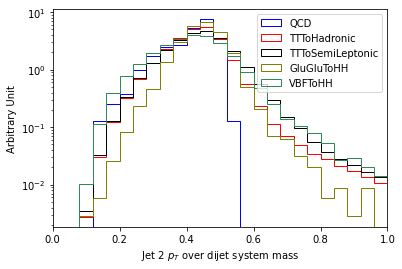

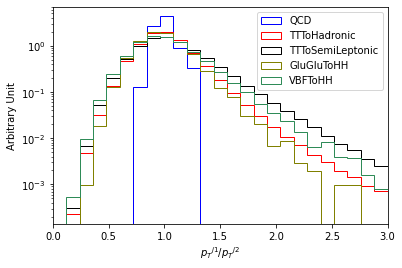

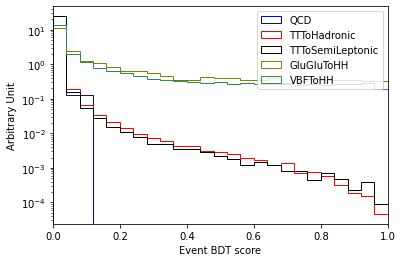

In [16]:
for j in range(len(var_names)):
    plt.figure
    plt.yscale('log')
    for i in range(len(dfs)):
        plt.hist(dfs[i][branch_names[j]], color=colors[i], bins=25, histtype='step', weights = dfs[i][b'weight'], range=(xlim_lo[j], xlim_hi[j]), density=True, label=f'{df_names[i]}')#, range=(0,1))
        plt.xlim(xlim_lo[j], xlim_hi[j])
    plt.xlabel(var_titles[j])
    plt.ylabel("Arbitrary Unit")
    plt.legend(loc='best')
    plt.savefig(var_names[j]+"_logY.pdf", dpi=150)
    plt.show()

correlation correlation coefficients [[1.         0.00344507]
 [0.00344507 1.        ]]
0.344507358948286
correlation correlation coefficients in signal region [[1.         0.12026092]
 [0.12026092 1.        ]]
12.026092113020919


No handles with labels found to put in legend.


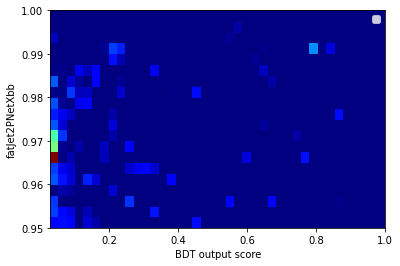

No handles with labels found to put in legend.


correlation correlation coefficients [[1.         0.00600564]
 [0.00600564 1.        ]]
0.6005641990596564
correlation correlation coefficients in signal region [[1.         0.08850918]
 [0.08850918 1.        ]]
8.85091819360717


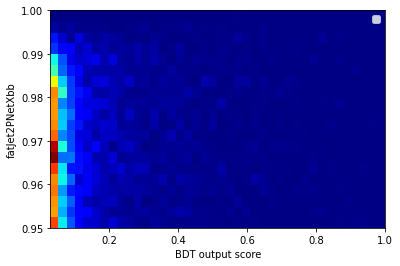

No handles with labels found to put in legend.


correlation correlation coefficients [[1.         0.19498332]
 [0.19498332 1.        ]]
19.498331971375467
correlation correlation coefficients in signal region [[1.         0.25028463]
 [0.25028463 1.        ]]
25.02846294202871


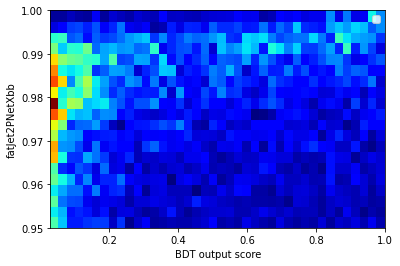

In [92]:
#ref https://www.python-graph-gallery.com/83-basic-2d-histograms-with-matplotlib
plt.figure
for i in range(len(dfs)-1):
    #correlation coefficient matrix ref https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
    r = np.corrcoef(dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'], dfs[i][b'fatJet2PNetXbb'])
    print('correlation correlation coefficients', r)
    print(r[0,1]*100)
    
    r2 = np.corrcoef(dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'][dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'] > 0.03][dfs[i][b'fatJet2PNetXbb'] > 0.95], 
                    dfs[i][b'fatJet2PNetXbb'][dfs[i][b'fatJet2PNetXbb'] > 0.95][dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'] > 0.03])
    print('correlation correlation coefficients in signal region', r2)
    print(r2[0,1]*100)
    
    plt.hist2d(dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'], dfs[i][b'fatJet2PNetXbb'], bins=[40,20], 
               weights = dfs[i][b'weight'], label=f'{df_names[i]}',
               range=[[0.03, 1], [0.95, 1]], cmap=plt.cm.jet)
    plt.ylabel('fatJet2PNetXbb')
    plt.xlabel('BDT output score')
    plt.legend(loc='best')
    plt.savefig("dis_2D.pdf", dpi=150)
    plt.show()

In [101]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    print(x[0],y[0],w)
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

In [96]:
# Compute the correlation.
for i in range(len(dfs)-1):
    r = corr(dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'][dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'] > 0.03][dfs[i][b'fatJet2PNetXbb'] > 0.95], 
                    dfs[i][b'fatJet2PNetXbb'][dfs[i][b'fatJet2PNetXbb'] > 0.95][dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'] > 0.03],
        dfs[i][b'weight'])
    print(r)

0.6602226
0.63581866
0.6493191


In [97]:
# Compute the correlation.
for i in range(len(dfs)-1):
    r = corr(dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'][dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'] > 0.03][dfs[i][b'fatJet2PNetXbb'] > 0.95], 
                    dfs[i][b'fatJet2PNetXbb'][dfs[i][b'fatJet2PNetXbb'] > 0.95][dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'] > 0.03],
        1)
    print(r)

0.9999795829235719
0.9999999663521081
0.9999999344687308


In [102]:
# Compute the correlation.
for i in range(len(dfs)-1):
    r = corr(dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'], dfs[i][b'fatJet2PNetXbb'],  1)
    print(r)

7.368762e-05 0.08792087 1
0.9999999999392457
0.054872476 0.40148365 1
0.9999999999057183
0.0007572078 0.9105693 1
0.9999999988922255


No handles with labels found to put in legend.


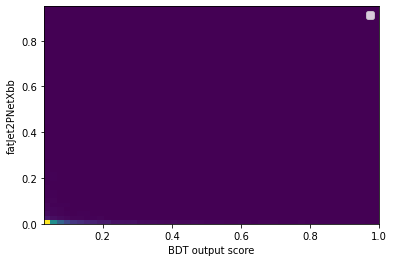

No handles with labels found to put in legend.


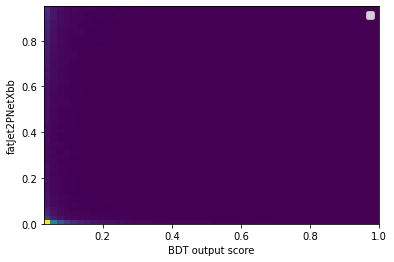

No handles with labels found to put in legend.


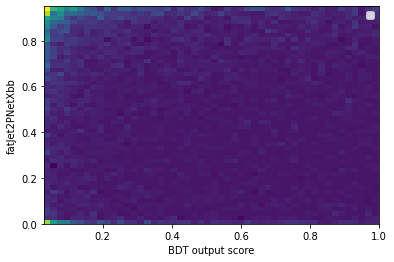

In [86]:
plt.figure
for i in range(len(dfs)-1):
    plt.hist2d(dfs[i][b'disc_qcd_and_ttbar_Run2_enhanced_v8p2'], dfs[i][b'fatJet2PNetXbb'], bins=[50,50], weights = dfs[i][b'weight'], label=f'{df_names[i]}',
               range=[[0.03, 1], [0., 0.95]])
    plt.ylabel('fatJet2PNetXbb')
    plt.xlabel('BDT output score')
    plt.legend(loc='best')
    plt.savefig("dis_2D_fail.pdf", dpi=150)
    plt.show()